In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score 


In [37]:
df = pd.read_csv('../Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [38]:
df.drop(['title'], inplace=True, axis=1)

In [39]:
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [40]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [42]:
SEED = 42

In [43]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=20, max_depth=11, random_state=SEED)
clf3 = GaussianNB()
clf4 = SVC(kernel='rbf', probability=True, random_state=SEED)
clf5 = KNeighborsClassifier()

In [44]:
clf1 = clf1.fit(X, y)
clf2 = clf2.fit(X, y)
clf3 = clf3.fit(X, y)
clf4 = clf4.fit(X, y)
clf5 = clf5.fit(X, y)

In [45]:
eclf = VotingClassifier(estimators=[('LR', clf1), ('RF', clf2), ('GB', clf3), ('SVC', clf4), ('KNN', clf5)],
                        voting='soft')

In [46]:
eclf = eclf.fit(X, y)

In [47]:
y_pred = eclf.predict(X_test)

In [48]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'ESRB Rating')

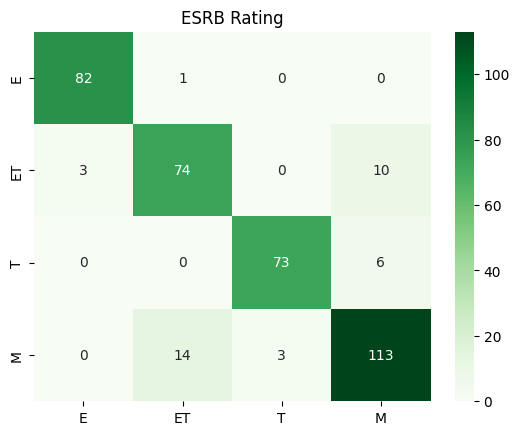

In [49]:
Labels = ["E","ET","T","M"] # labels for x-axis
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels).set_title('ESRB Rating')

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           E       0.96      0.99      0.98        83
          ET       0.83      0.85      0.84        87
           M       0.96      0.92      0.94        79
           T       0.88      0.87      0.87       130

    accuracy                           0.90       379
   macro avg       0.91      0.91      0.91       379
weighted avg       0.90      0.90      0.90       379

